
### Loading the dataset


In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("mushrooms.csv")

In [ ]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
train.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Encoding the data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
df = train.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
train_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
train_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.036613,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,-0.964680,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-0.964680,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.036613,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,-0.964680,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


### EDA

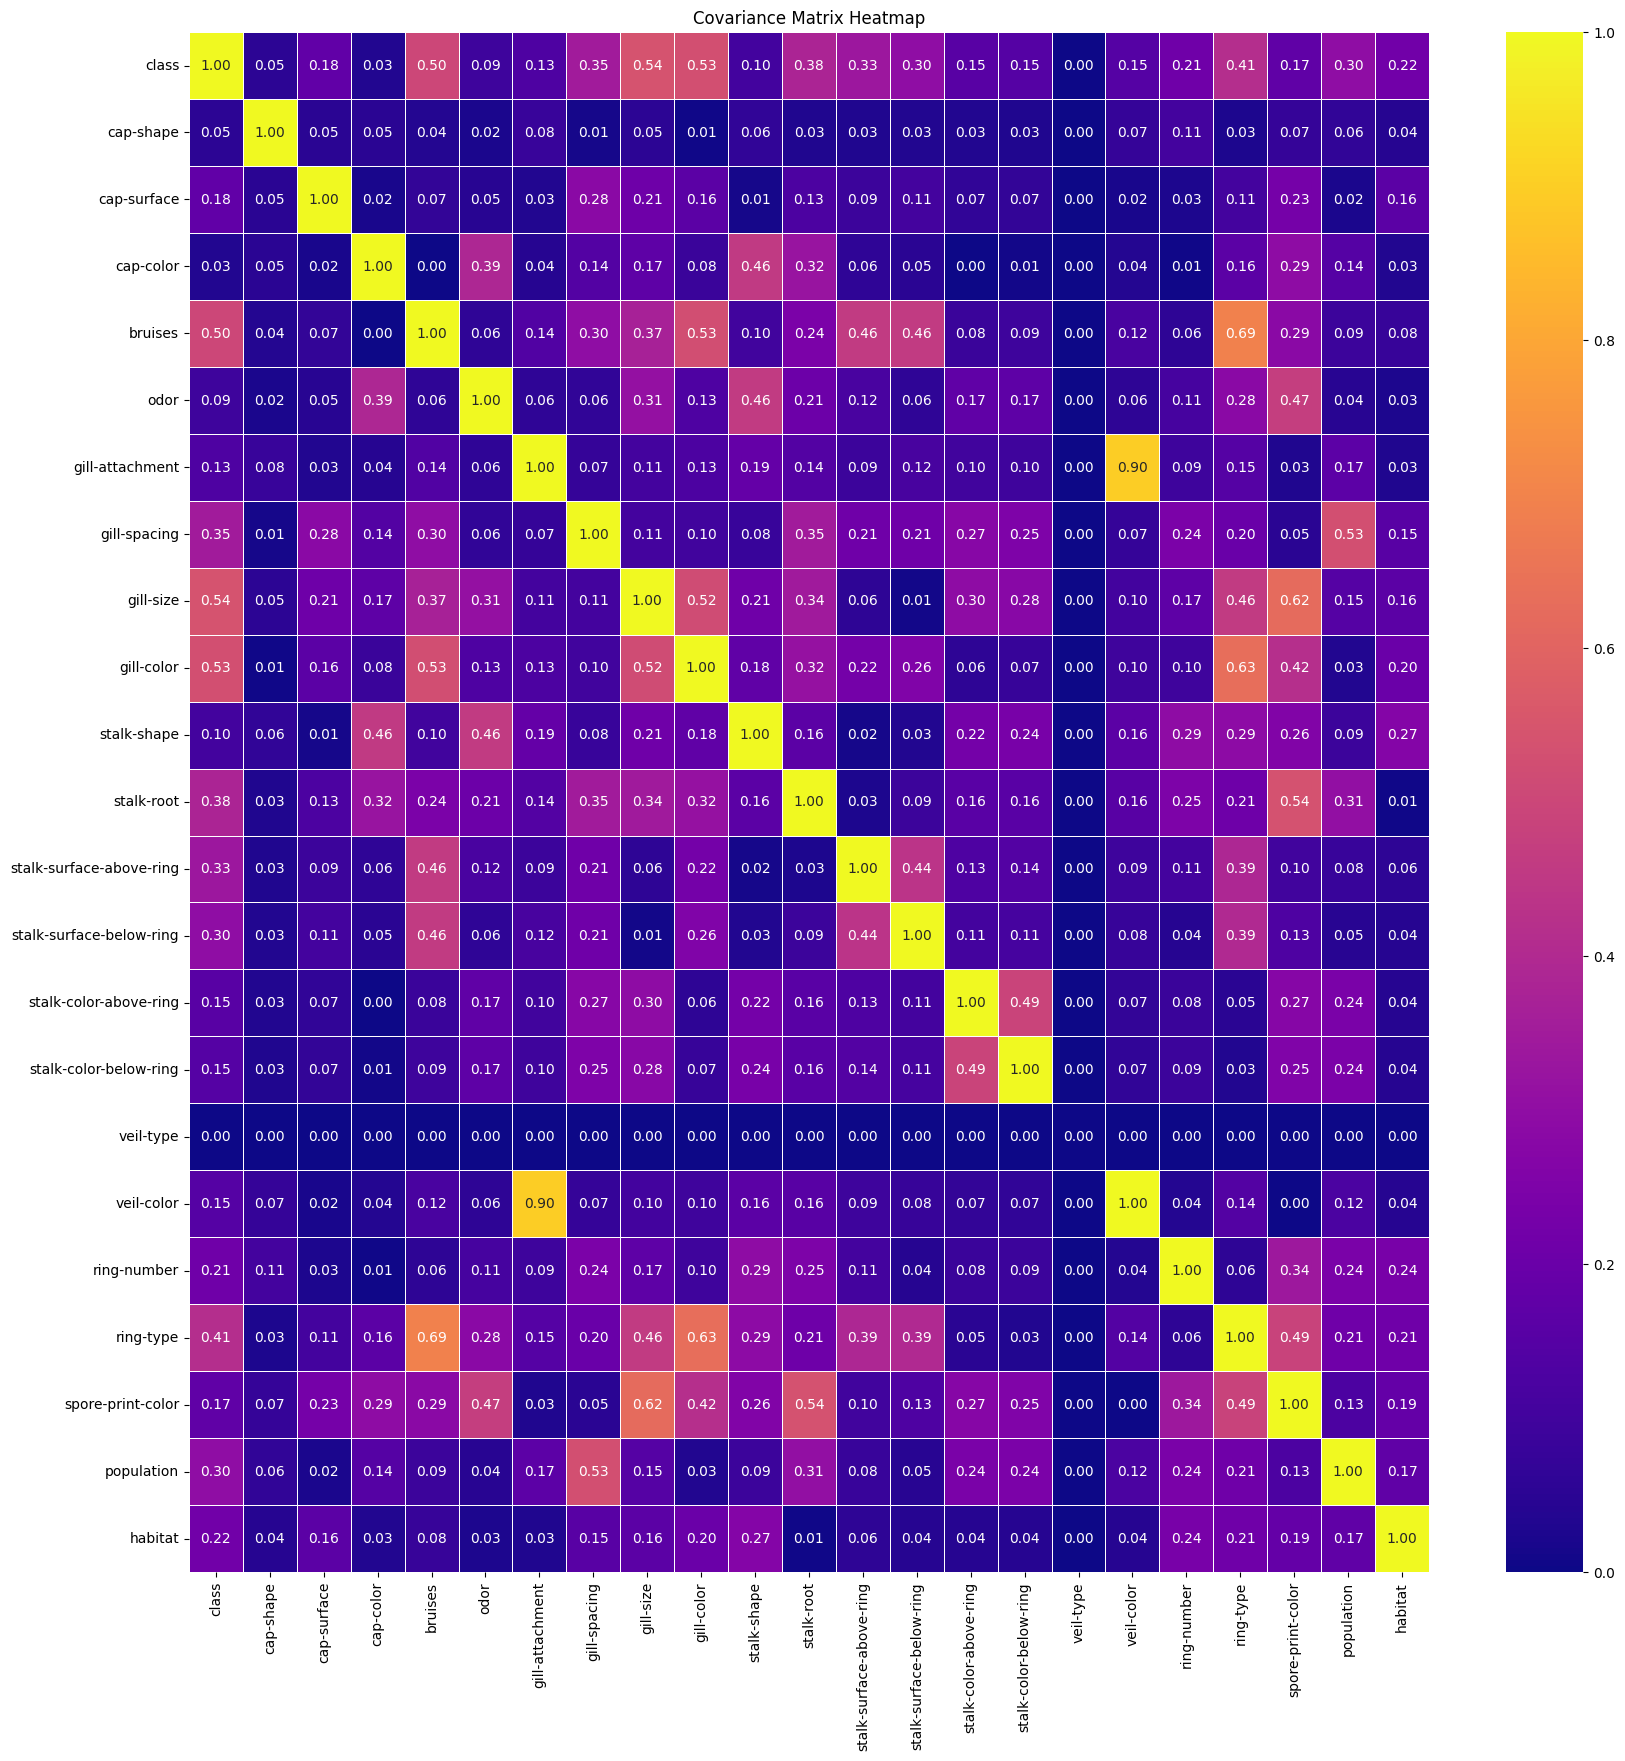

In [ ]:
cov_matrix = abs(train_df.cov())
plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=.5)
plt.title('Covariance Mat')
plt.show()

### observed 0 covariance for viel type so removing it from the dataset

In [ ]:
df=df.drop(['veil-type' ], axis=1)


Missing values summary:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Descriptive statistics:
             class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.54582

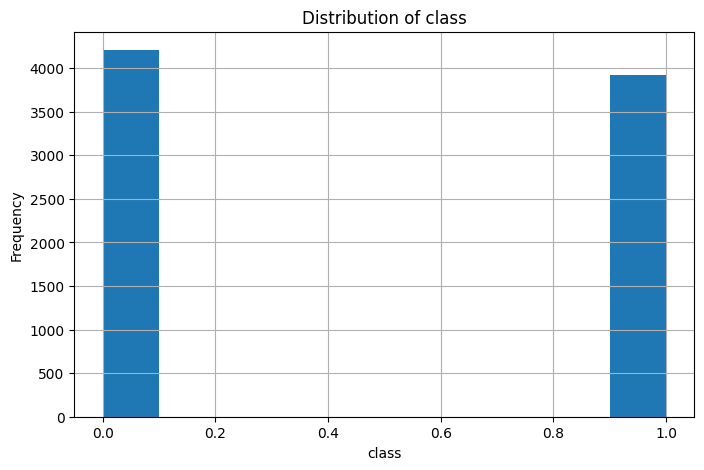

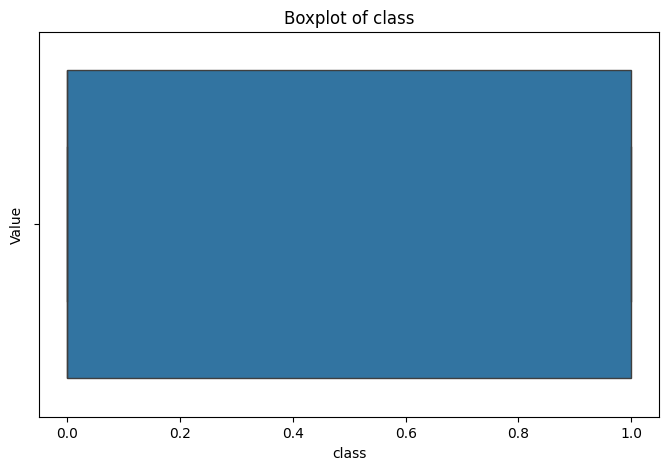

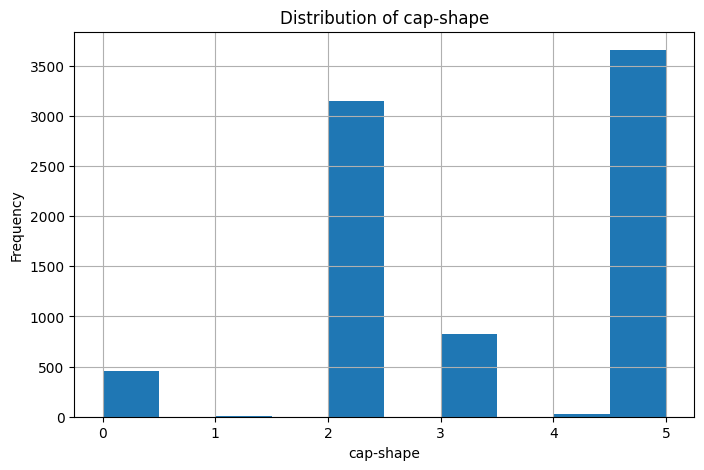

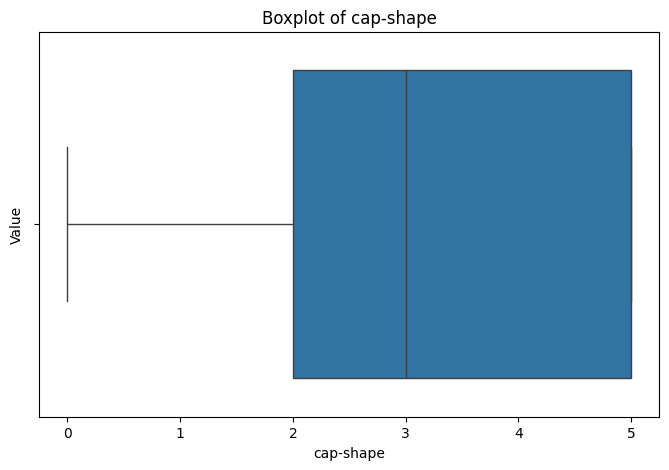

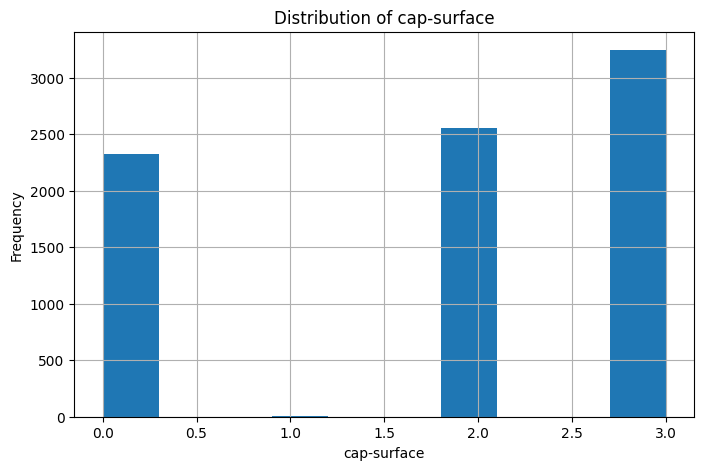

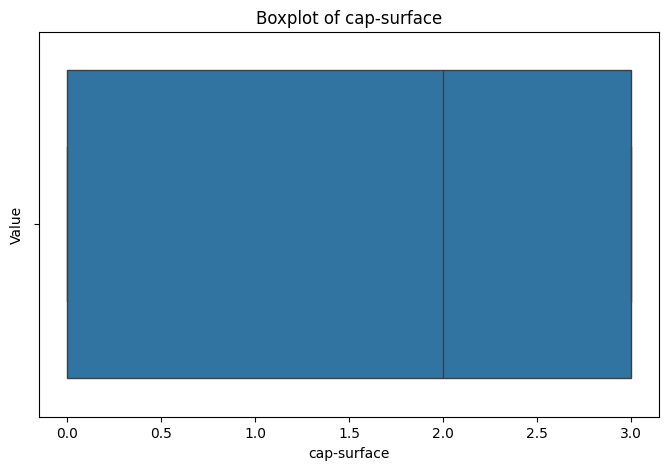

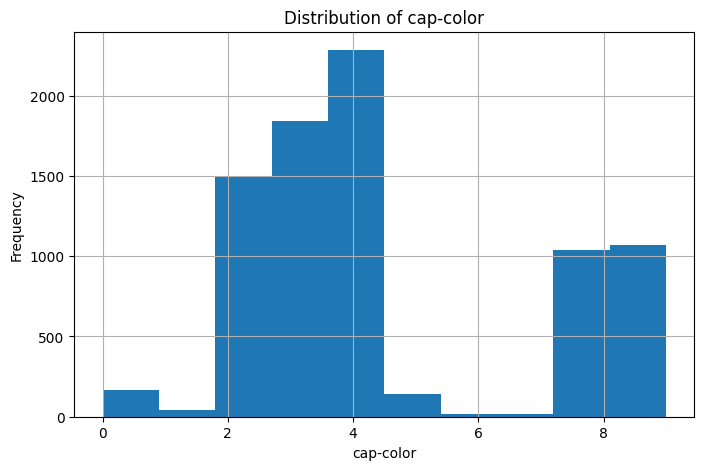

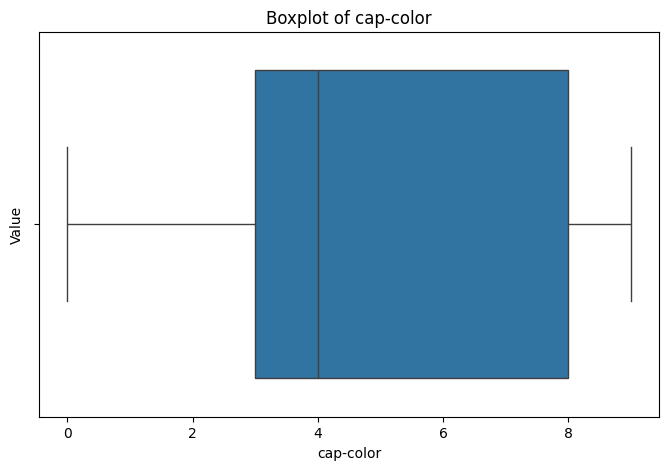

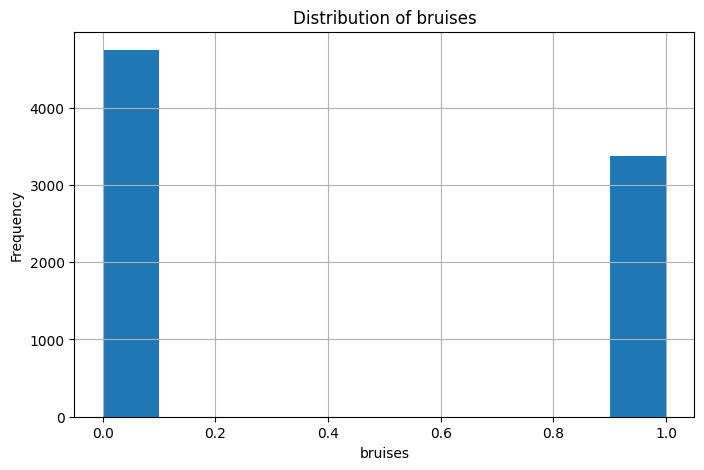

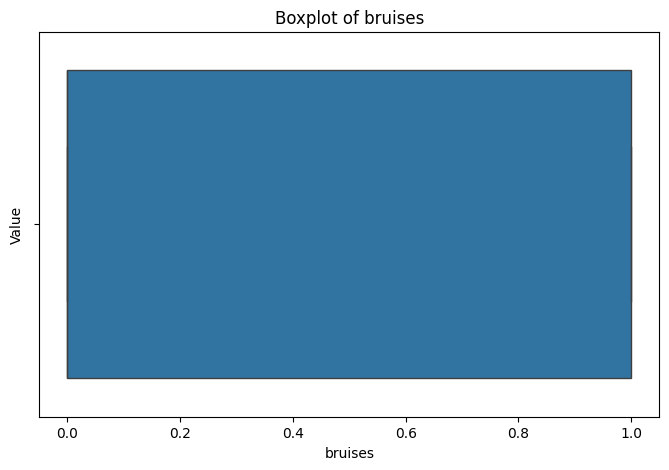

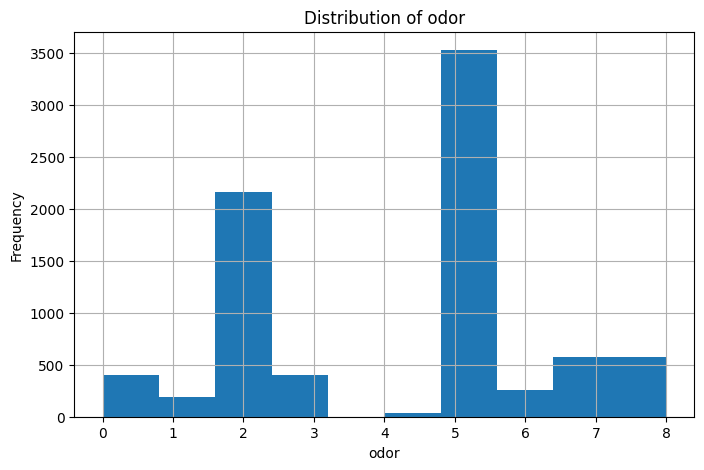

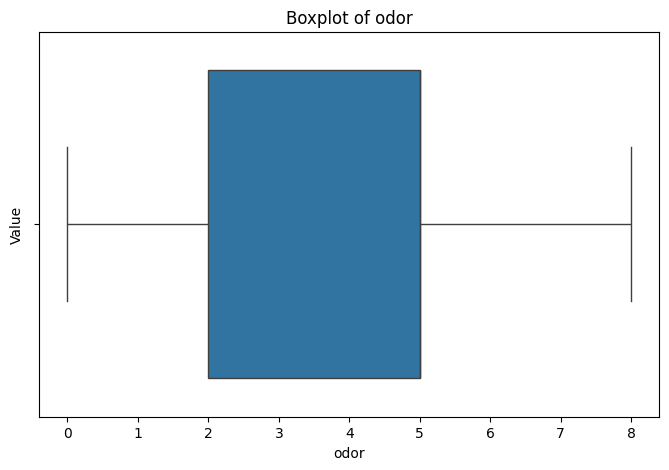

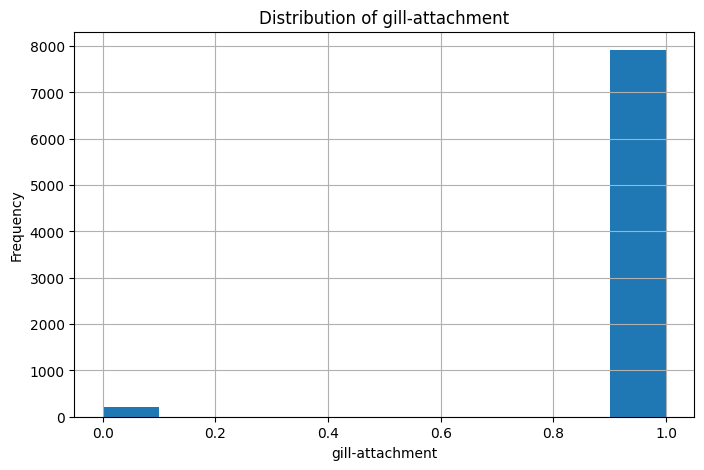

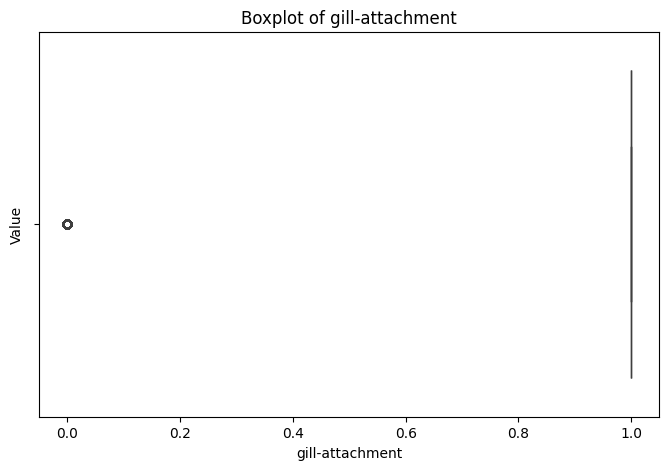

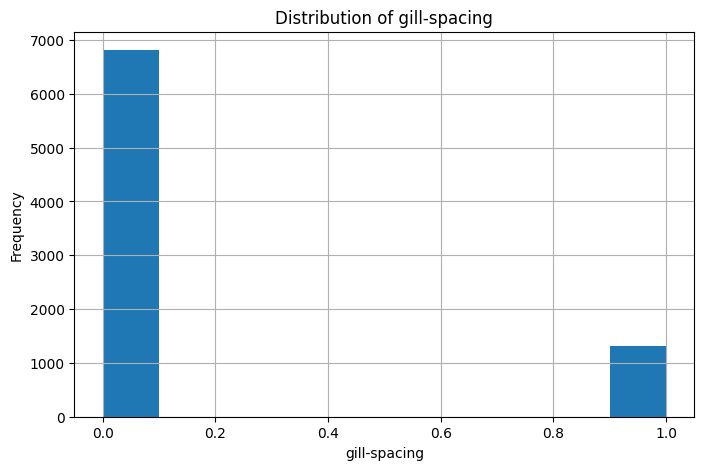

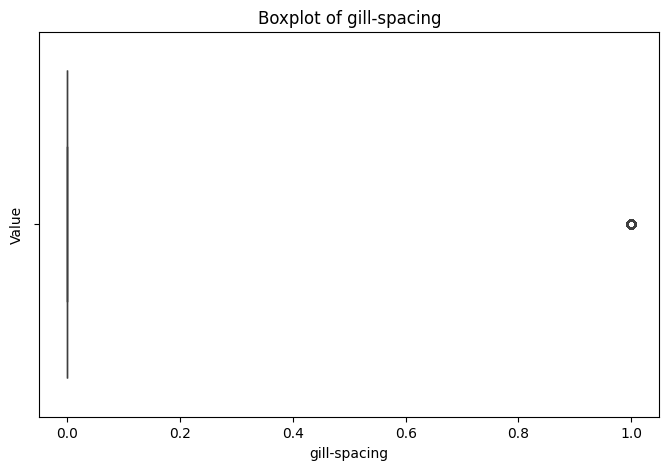

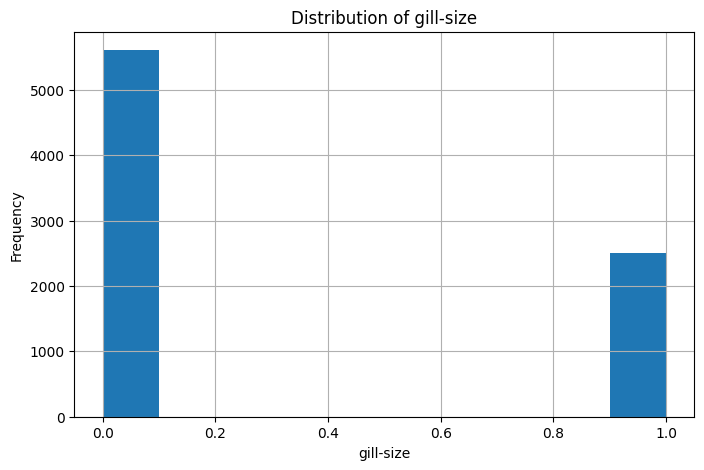

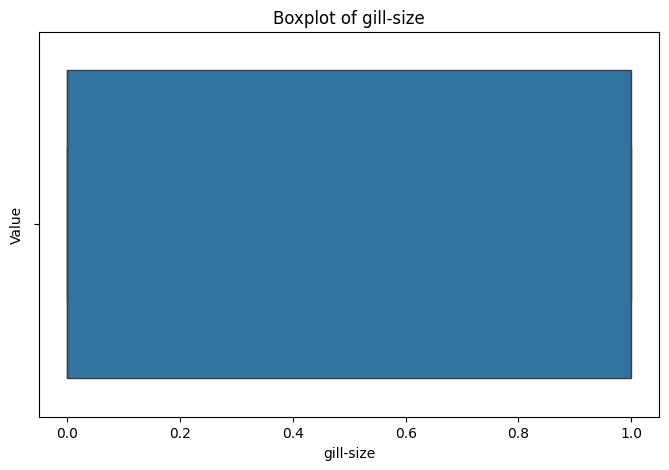

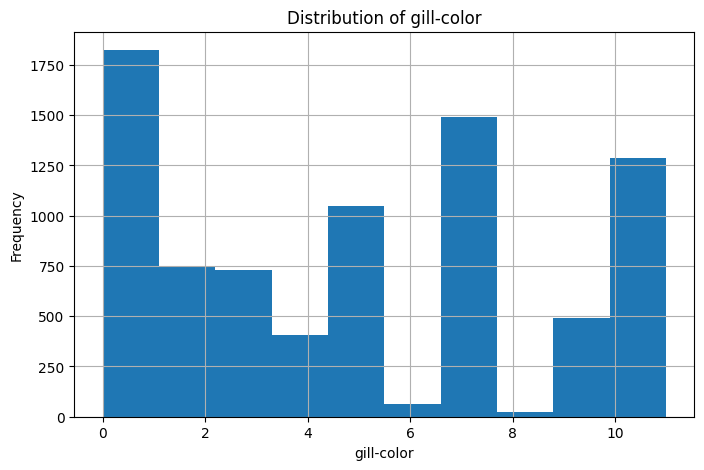

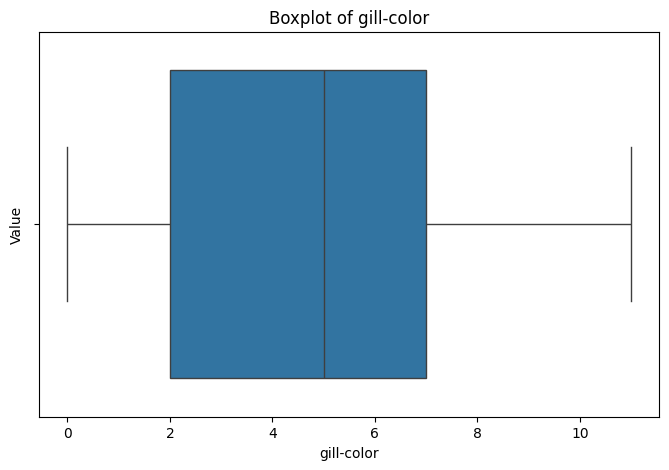

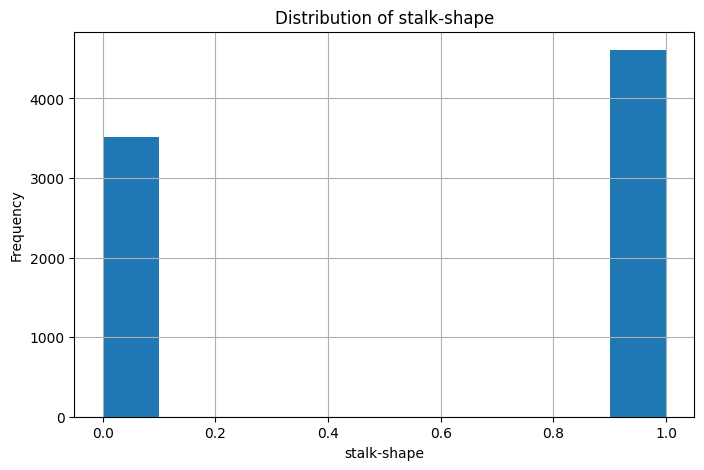

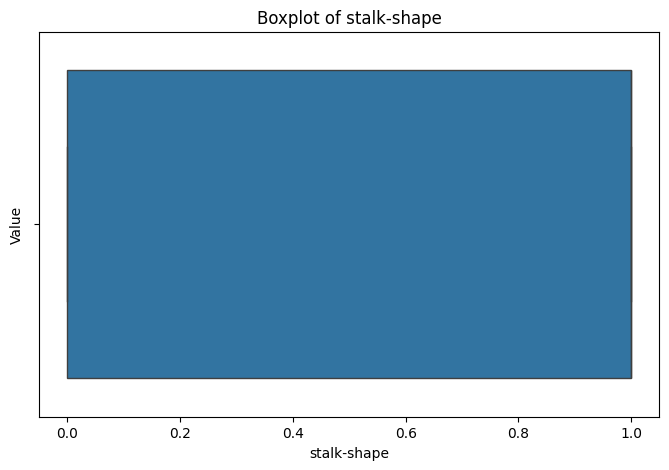

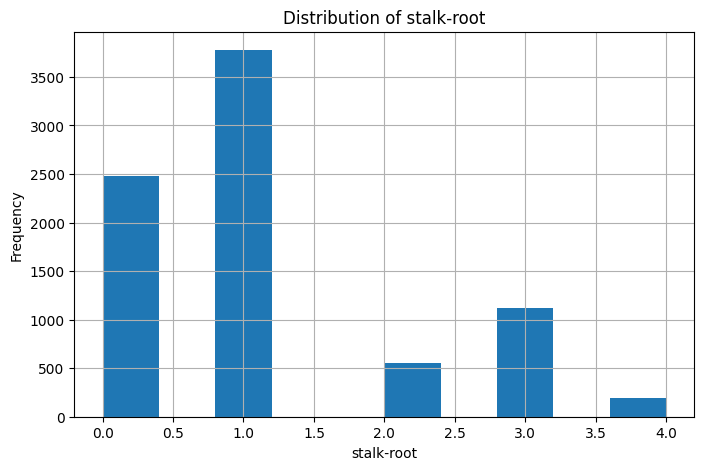

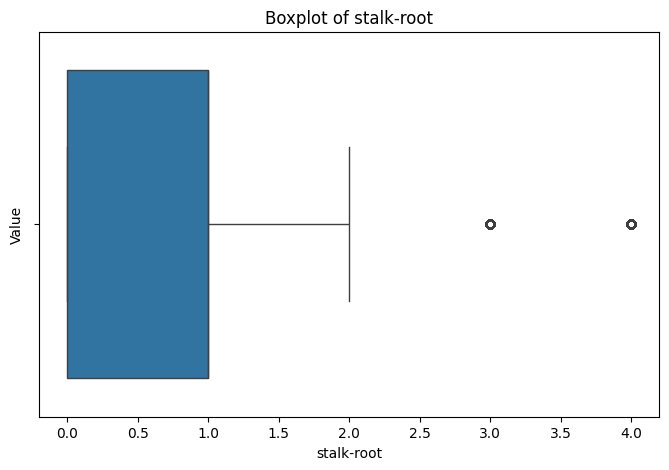

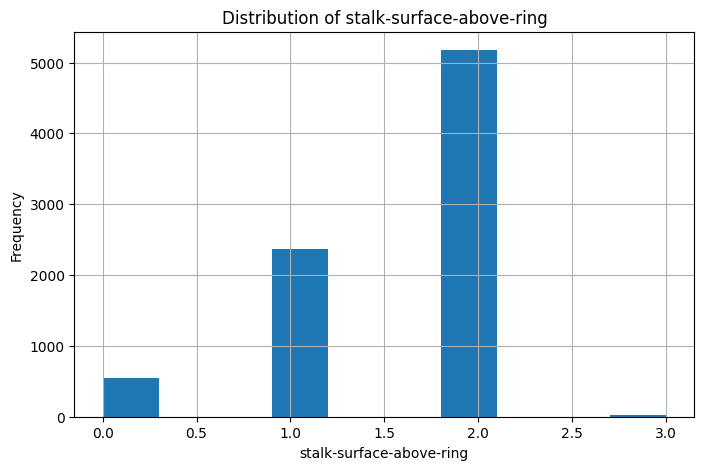

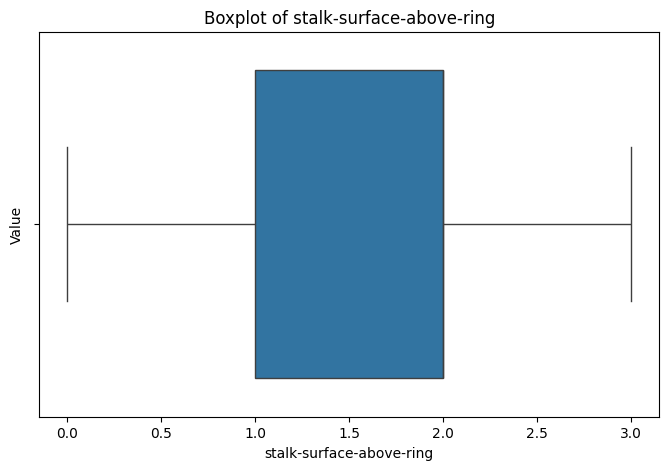

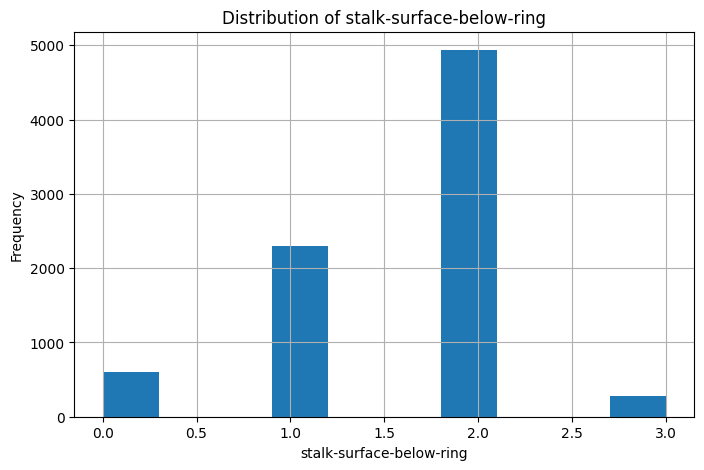

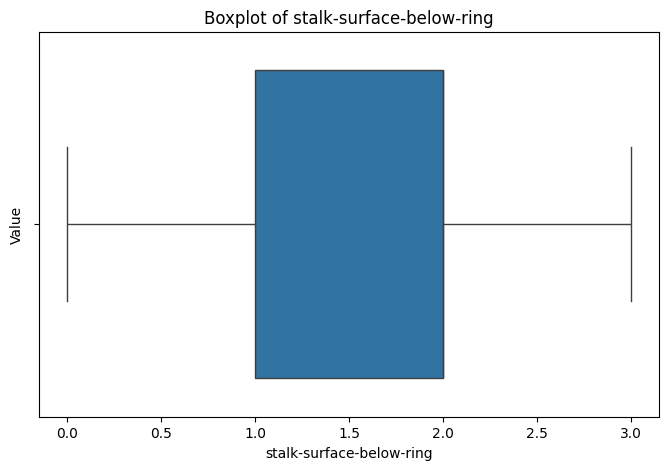

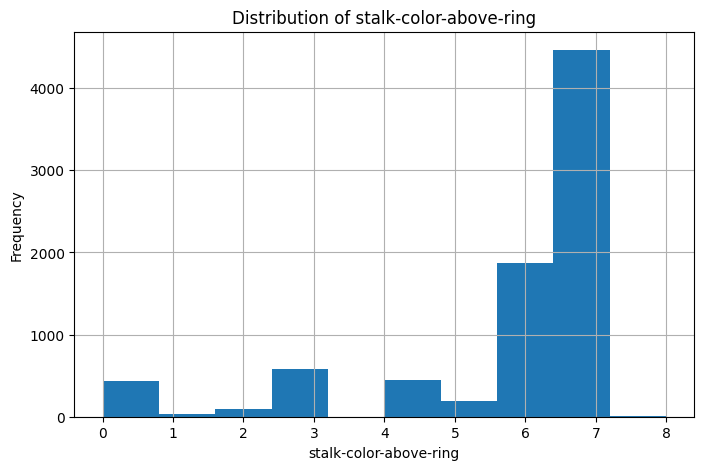

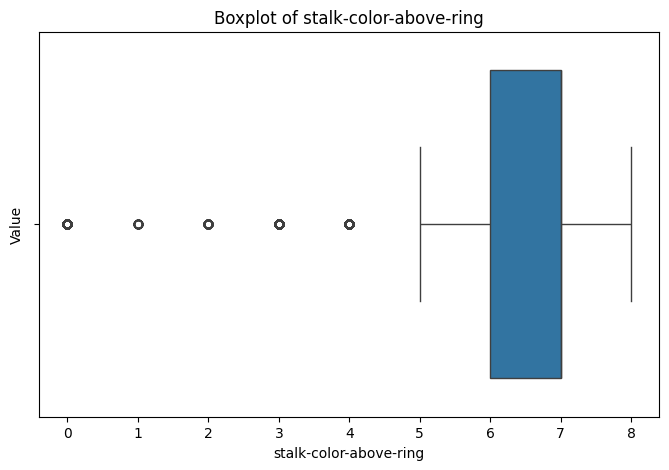

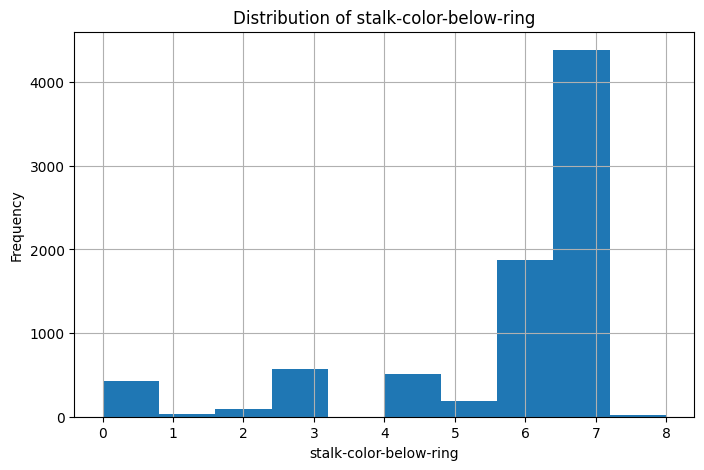

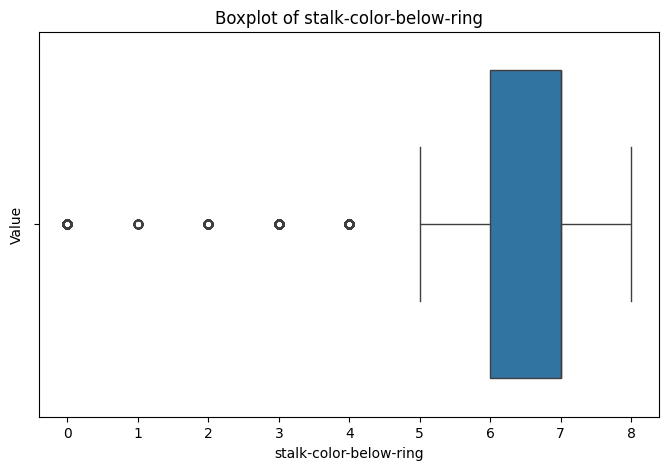

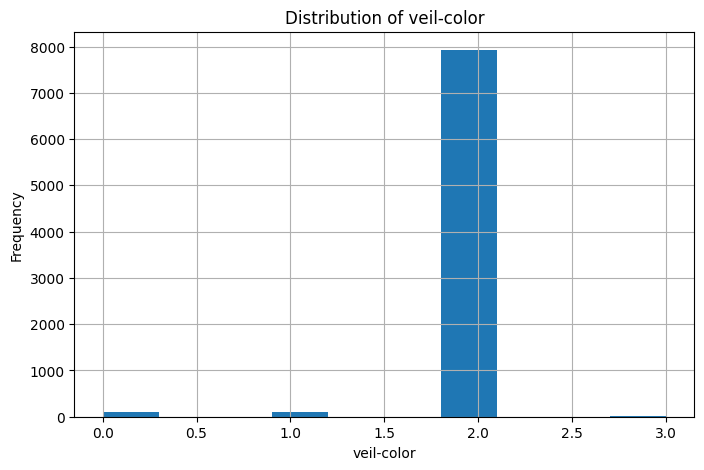

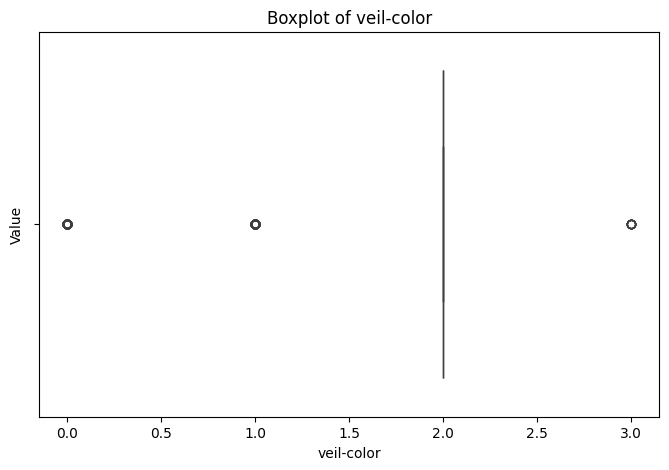

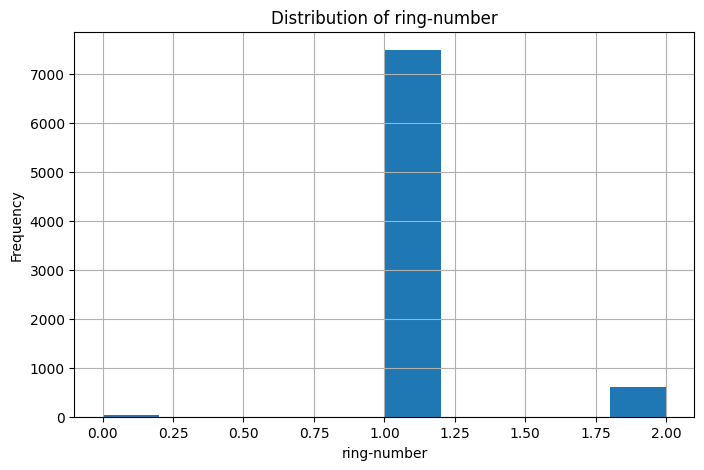

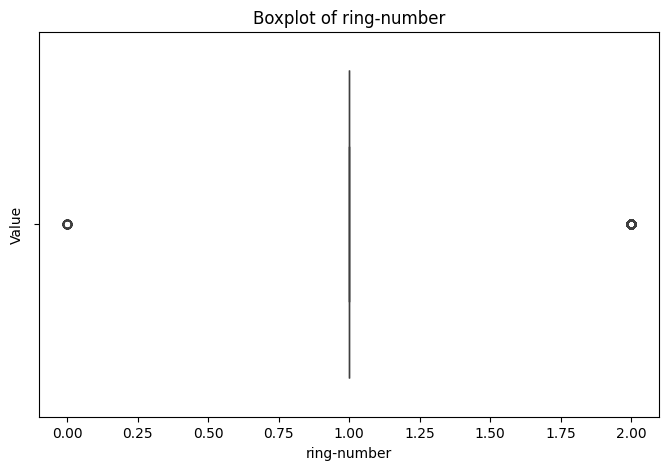

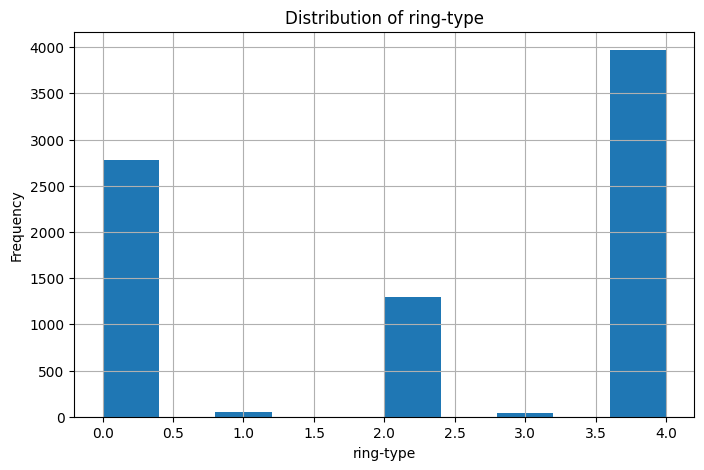

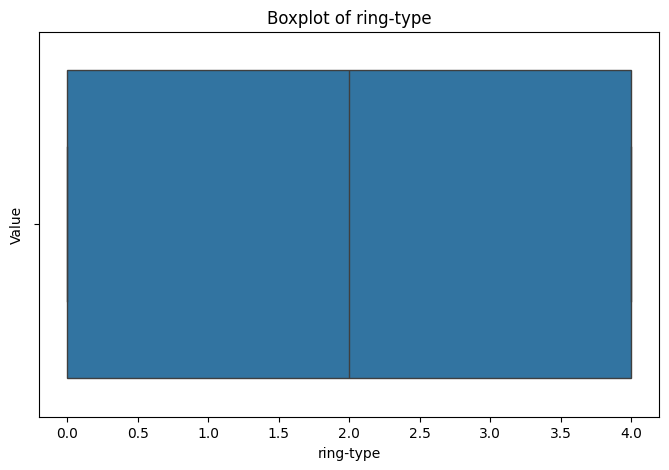

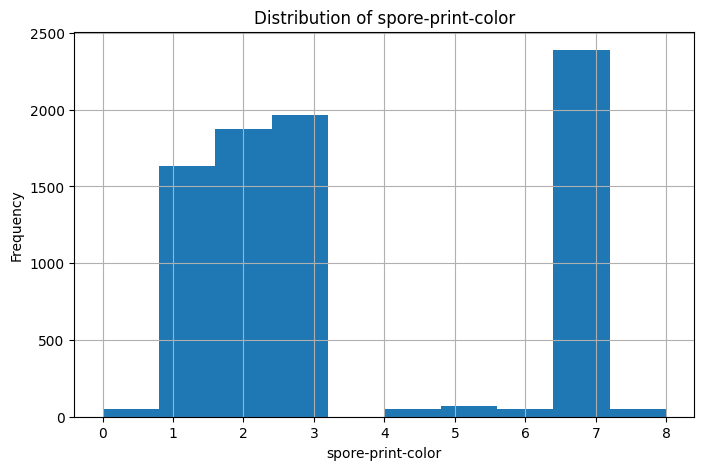

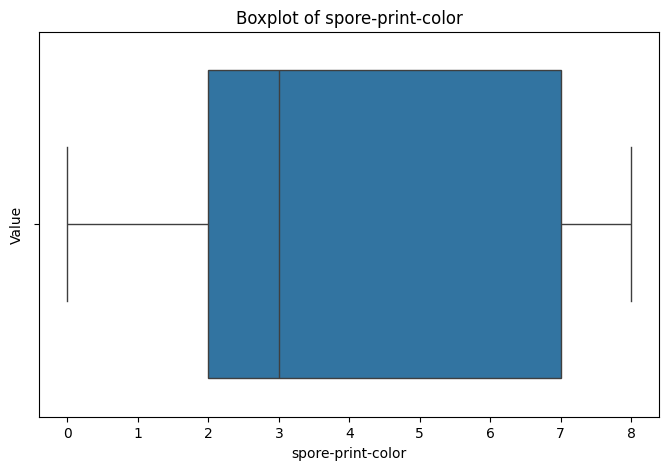

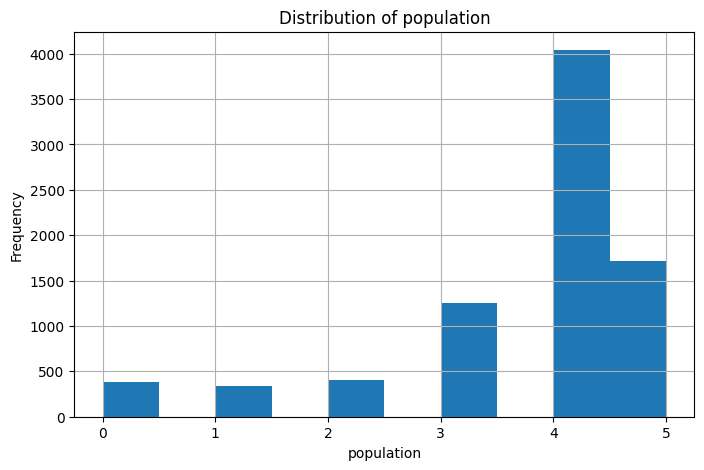

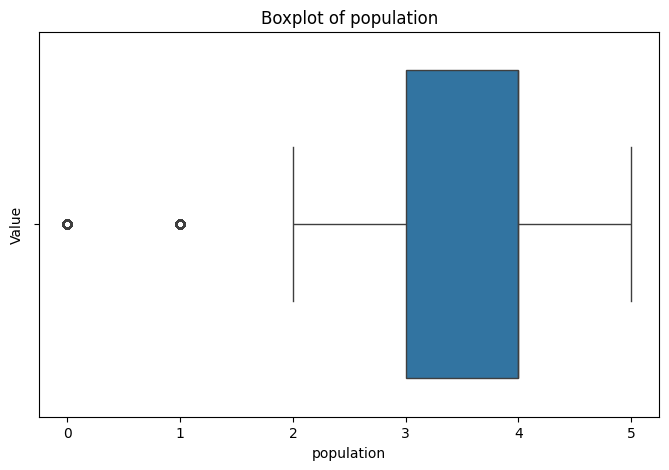

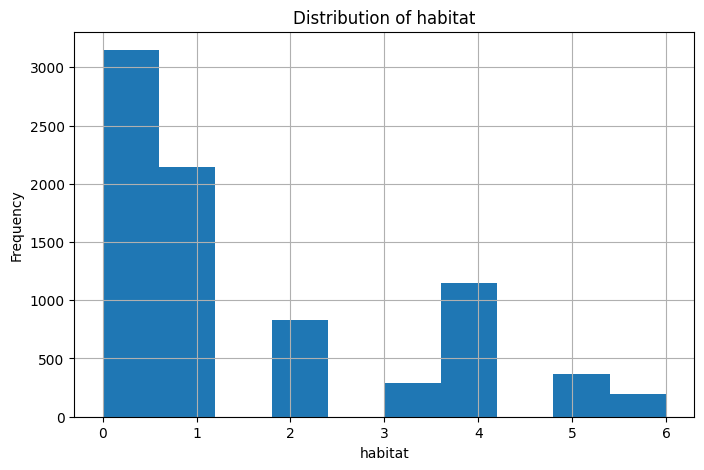

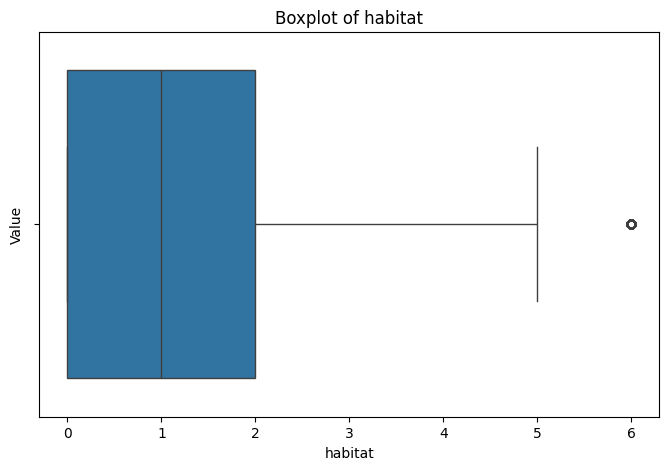

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print("Missing values summary:")
print(df.isnull().sum())
numerical_cols = df.select_dtypes(include=np.number).columns


print("\nDescriptive statistics:")
print(df[numerical_cols].describe())  # Summary of central tendency, spread


for col in numerical_cols:
  # Distribution (Histogram)
  plt.figure(figsize=(8, 5))
  df[col].hist(grid=True)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {col}")
  plt.show()

)
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=col, data=df)
  plt.xlabel(col)
  plt.ylabel("Value")
  plt.title(f"Boxplot of {col}")
  plt.show()


### train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train=df.drop(['class'], axis=1)
Y_train=df['class']
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

### Linear Regresssion

In [ ]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(x_train, y_train)
y_pred = modellr.predict(x_test)
accuracy = modellr.score(x_test, y_test)
print(f"Accuracy (R-squared): {accuracy:.2f}")

Accuracy (R-squared): 0.76


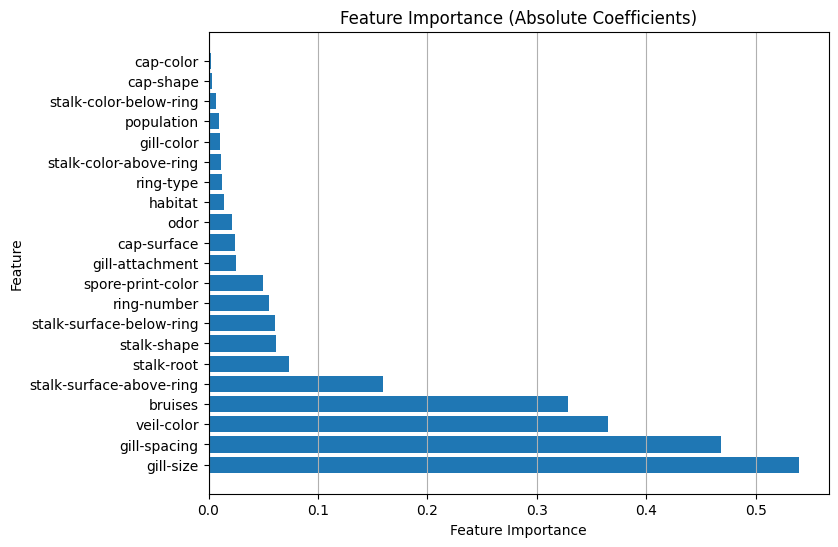

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
importances = abs(model.params[1:])
feature_names = x_train.columns

# sort feat
sorted_idx = importances.argsort()[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

# plot feat
plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Absolute Coefficients)')
plt.grid(axis='x')
plt.show()


In [ ]:
# creating a dict to store all the accuracies of model done for ths test
accu_dict=dict()
accu_dict["Linear Regression"]=accuracy
print(accu_dict)

{'Linear Regression': 0.7572810501972241}


### Perceptron learning algorithm

In [ ]:
# Perceptron Learning Algorithm
class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, max_epochs=100):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

    def train(self, X, y):
        for _ in range(self.max_epochs):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                update = self.learning_rate * (yi - prediction)
                self.weights += update * xi
                self.bias += update
perceptron = Perceptron(num_features=x_train.shape[1])
perceptron.train(x_train.values, y_train.values)

In [ ]:
print(perceptron.weights , perceptron.bias)

[-0.14  0.2  -0.01  0.41 -0.46 -1.63 -7.95  8.09 -0.06 -0.26 -2.71 -4.83
  0.11 -0.14 -0.07  6.16  1.1   1.43 -0.26 -0.49  0.07] -0.7000000000000005


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(x_test.values)
print(y_pred)


[0 0 1 ... 1 1 0]


In [ ]:

accuracy=accuracy_score(y_pred, l1)
accu_dict["PLA"]=accuracy
print(accuracy)


0.955076923076923


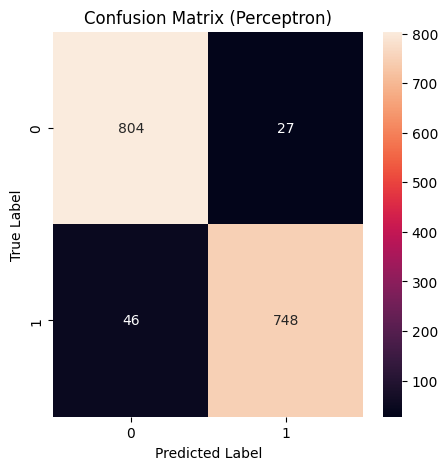

Confusion Matrix:
[[804  27]
 [ 46 748]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Perceptron)')
plt.show()


print("Confusion Matrix:")
print(cm)


# Multi Layer perceptron network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_dim = x_train.shape[1]
output_dim = 1

model = Sequential([
    Dense(64, input_dim=input_dim, activation='tanh'),
    Dense(128, input_dim=input_dim, activation='tanh'),
    Dense(64, input_dim=input_dim, activation='tanh'),
    Dense(output_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train.values, y_train.values, epochs=5, batch_size=60, validation_split=0.3)
loss, accuracy = model.evaluate(x_test.values, y_test.values)



Epoch 1/5
76/76 [==============================] - 2s 6ms/step - loss: 0.3316 - accuracy: 0.8611 - val_loss: 0.1923 - val_accuracy: 0.9200
Epoch 2/5
76/76 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.9411 - val_loss: 0.0965 - val_accuracy: 0.9718
Epoch 3/5
76/76 [==============================] - 0s 4ms/step - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.0465 - val_accuracy: 0.9856
Epoch 4/5
76/76 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.9912 - val_loss: 0.0215 - val_accuracy: 0.9964
Epoch 5/5
51/51 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9994


In [ ]:
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
accu_dict["MLP"]=accuracy

Test Loss: 0.009274663403630257
Test Accuracy: 0.9993846416473389


### KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred_for_KNN = KNN.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_for_KNN)
print(accuracy)
accu_dict["KNN"]=accuracy

0.9993846153846154


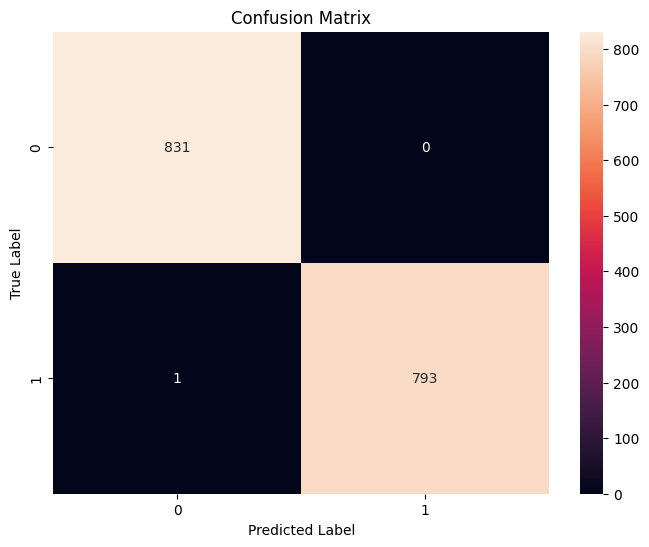

In [ ]:
cm = confusion_matrix(y_test, y_pred_for_KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


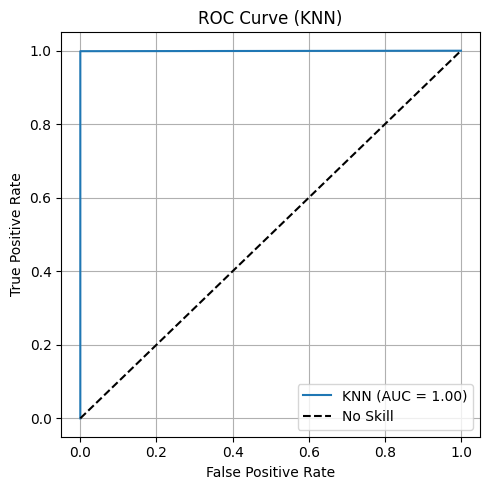

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_pred_for_KNN)
auc = roc_auc_score(y_test, y_pred_for_KNN)


plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Skill')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### NB Classifier

In [79]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_for_NB = nb.predict(x_test)


In [80]:
nbaccuracy = accuracy_score(y_test, y_pred_for_NB)
print(accuracy)
accu_dict["NB"]=accuracy

0.9993846153846154


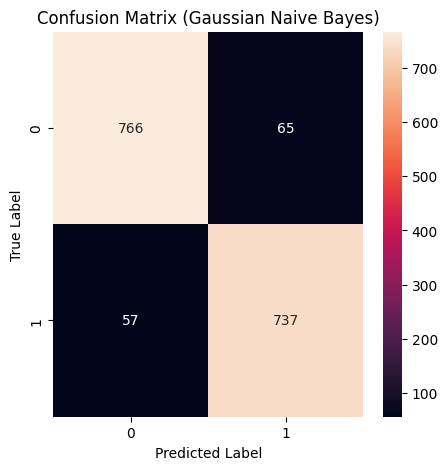

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_for_NB)


plt.figure(figsize=(5, 5))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Gaussian Naive Bayes)')
plt.show()


fpr, tpr, threshold = roc_curve(y_test, y_pred_for_NB)
auc = roc_auc_score(y_test, y_pred_for_NB)


plt.figure(figsize=(5, 5))



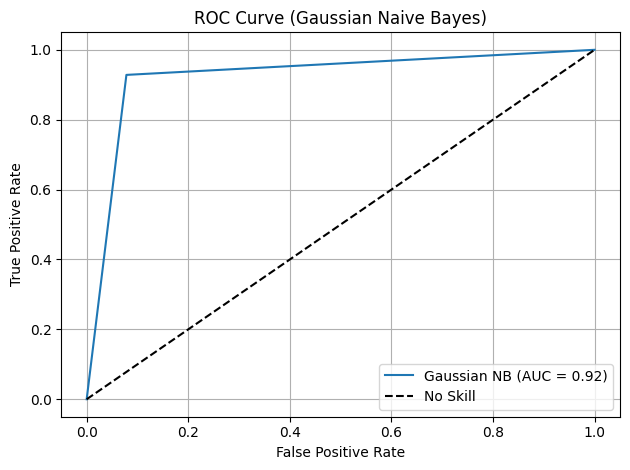

In [ ]:

plt.plot(fpr, tpr, label=f'Gaussian NB (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Skill')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gaussian Naive Bayes)')
plt.legend()
plt.grid(True)

# Show the plot with adjusted margins for a smaller size
plt.tight_layout()
plt.show()


### SVM

In [83]:
from sklearn.svm import SVC
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(x_train,y_train)
y_pred_for_SVM = SVM.predict(x_test)


In [84]:
training_data_accuracy = accuracy_score(y_test, y_pred_for_SVM)
print(accuracy)
accu_dict["SVM"]=accuracy

0.9993846153846154


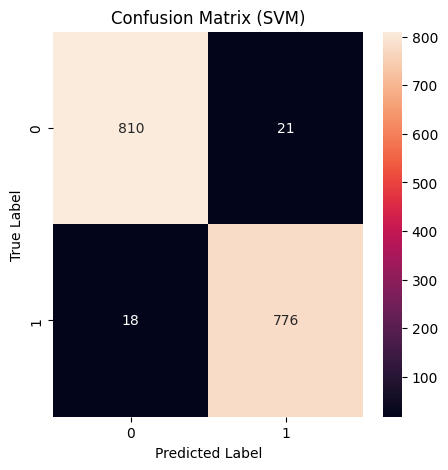

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns  #
cm = confusion_matrix(y_test, y_pred_for_SVM)
plt.figure(figsize=(5, 5))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM)')
plt.show()


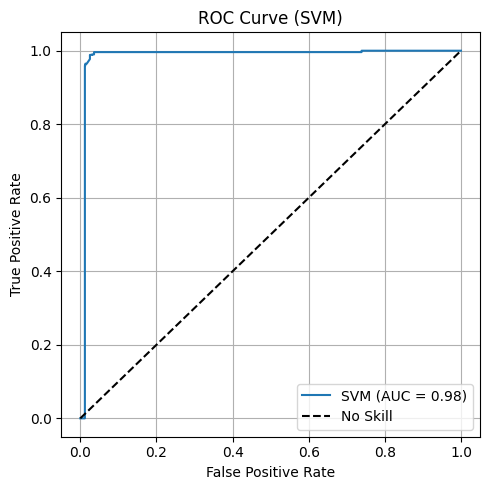

In [ ]:

fpr, tpr, threshold = roc_curve(y_test, SVM.predict_proba(x_test)[:, 1])
auc = roc_auc_score(y_test, SVM.predict_proba(x_test)[:, 1])

plt.figure(figsize=(5, 5))


plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Skill')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


In [85]:
accu_dict

{'Linear Regression': 0.7572810501972241,
 'PLA': 0.955076923076923,
 'MLP': 0.9993846416473389,
 'KNN': 0.9993846153846154,
 'NB': 0.9993846153846154,
 'SVM': 0.9993846153846154}

In [87]:
highest_score = max(accu_dict.values())
best_models = [model for model, score in accu_dict.items() if score == highest_score]

for model, score in accu_dict.items():
  print(f"{model}: {score:.2%}")


if len(best_models) == 1:
  print(f"\nThe most accurate model is: {best_models[0]}")
else:
  print(f"\nThe most accurate models (tied) are: {', '.join(best_models)}")

Linear Regression: 75.73%
PLA: 95.51%
MLP: 99.94%
KNN: 99.94%
NB: 99.94%
SVM: 99.94%

The most accurate model is: MLP
